In [1]:
import pickle
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import load_model


### load test set and best model

In [5]:
with open("data_dic.pkl", "rb") as f:
    data = pickle.load(f)
    
train = data['train']
train_target = data['train_target']
validation = data['validation']
validation_target = data['validation_target']
test = data['test']
test_target = data['test_target']

In [10]:
best_model_name = "model_script_4"
model = load_model(best_model_name)
pred = model.predict(test)

### find best/worst cases in terms of categorical cross entrpy loss

In [16]:
import tensorflow as tf
cce = tf.keras.losses.CategoricalCrossentropy()

cce_list = []
for i in range(len(pred)):
    cce_list.append(cce(test_target[i], pred[i]))
cce_list =[c.numpy() for c in cce_list]

(array([  1.,  11.,  28.,  51., 107., 144., 454., 596., 486., 262.]),
 array([1.64371204, 1.7696178 , 1.89552355, 2.0214293 , 2.14733505,
        2.2732408 , 2.39914656, 2.52505231, 2.65095806, 2.77686381,
        2.90276957]),
 <BarContainer object of 10 artists>)

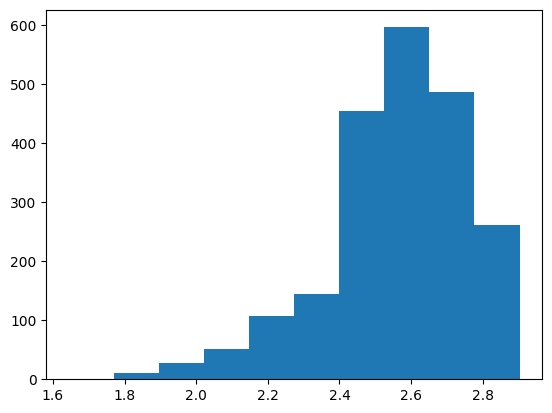

In [45]:
plt.hist(cce_list)

In [47]:
best_index = (np.array(cce_list) < 1.87)
worst_index = (np.array(cce_list) > 2.895)

### plot best/worst cases

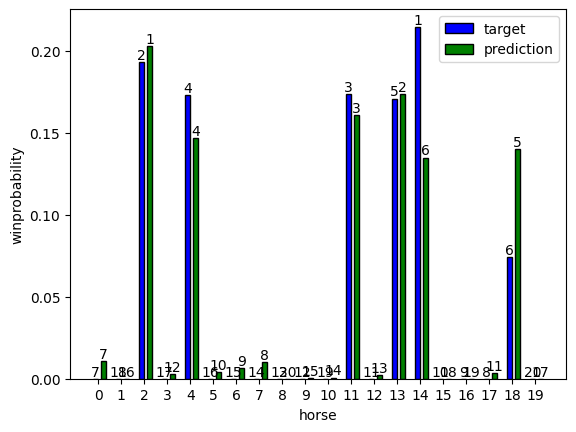

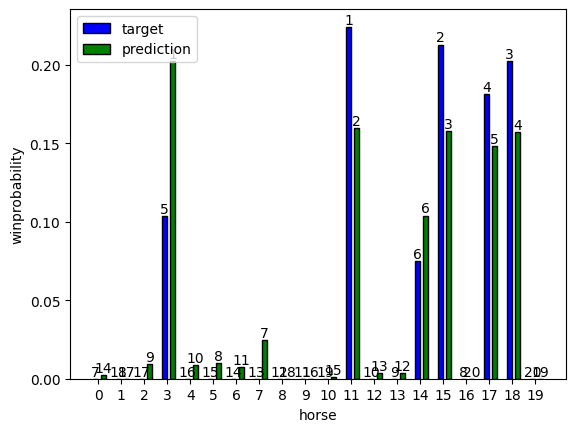

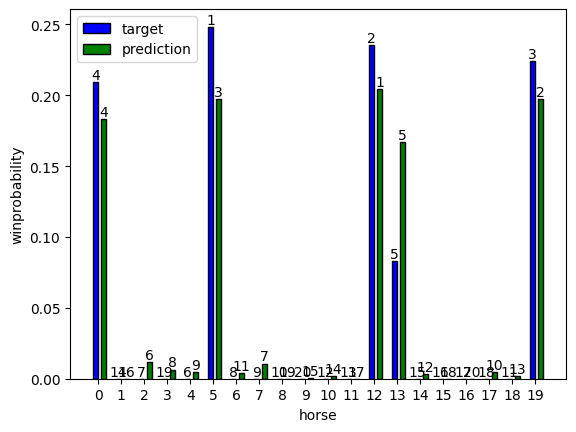

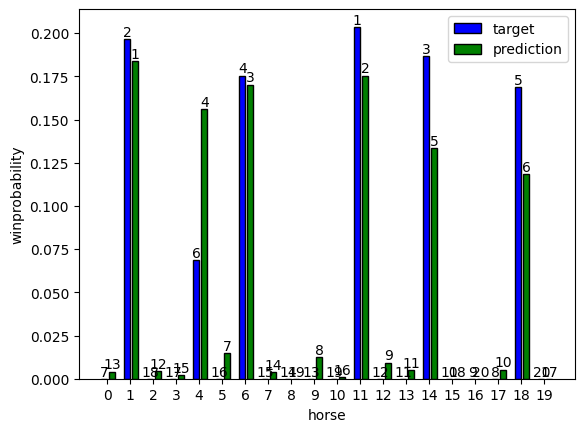

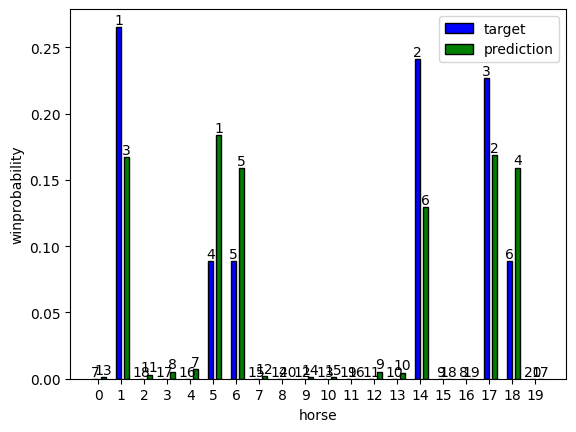

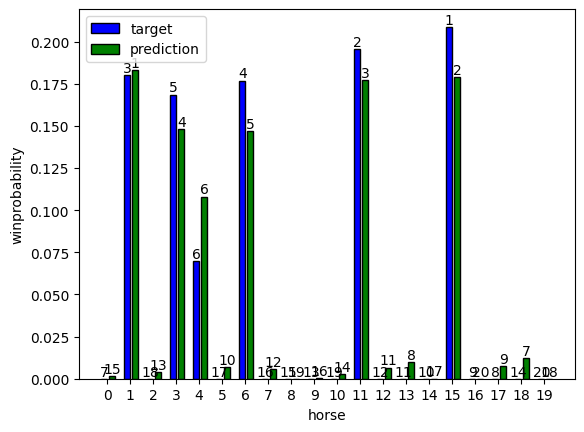

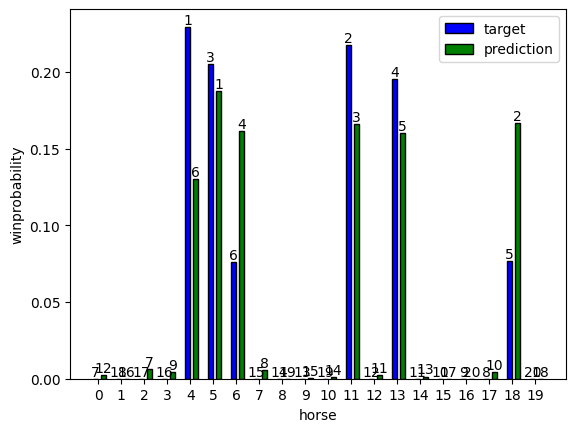

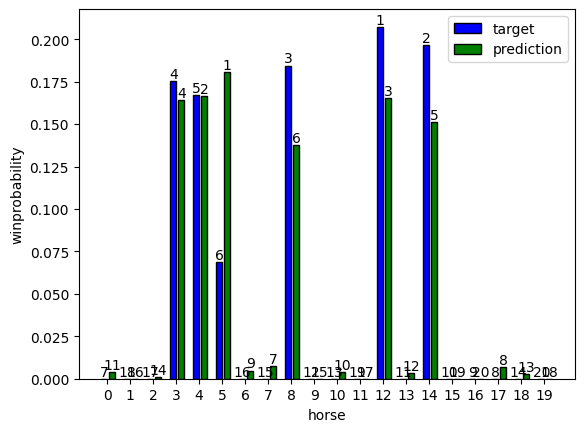

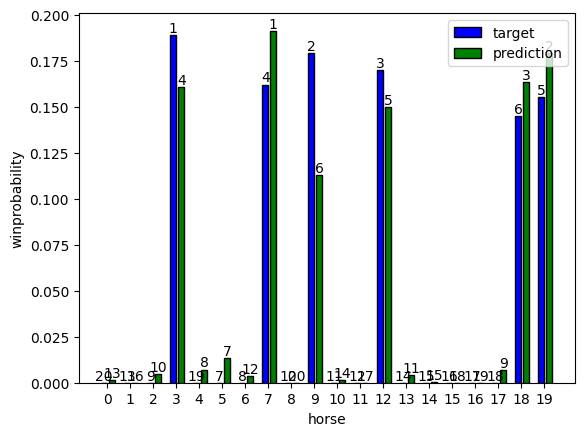

In [53]:
# best cases
import numpy as np 
import matplotlib.pyplot as plt 

best_cases_target = np.array(test_target)[best_index]
best_cases_pred = np.array(pred)[best_index]

width = 0.25
X = np.array(range(20))
for i in range(9):
    bar1 = plt.bar(X, best_cases_target[i], color = 'b', 
            width = width, edgecolor = 'black', 
            label='target')
    order = (-best_cases_target[i]).argsort()
    ranks_1 = order.argsort()+1

    bar2 = plt.bar(X + width+0.1, best_cases_pred[i], color = 'g', 
            width = width, edgecolor = 'black', 
            label='prediction')
    order = (-best_cases_pred[i]).argsort()
    ranks_2 = order.argsort()+1
    
    # Add counts above the two bar graphs
    for index, rect in enumerate(bar1):
        height = rect.get_height()
        rank = ranks_1[index]
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{rank:.0f}', ha='center', va='bottom')
        
    for index, rect in enumerate(bar2):
        height = rect.get_height()
        rank = ranks_2[index]
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{rank:.0f}', ha='center', va='bottom')

    plt.xlabel("horse") 
    plt.ylabel("winprobability")
    plt.legend()
    plt.xticks(X + width/2,range(20))


    plt.show() 

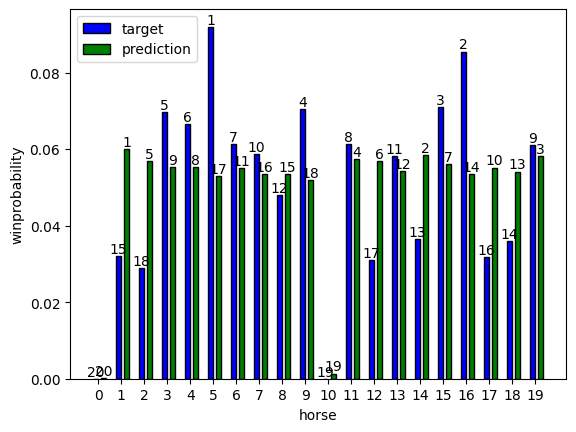

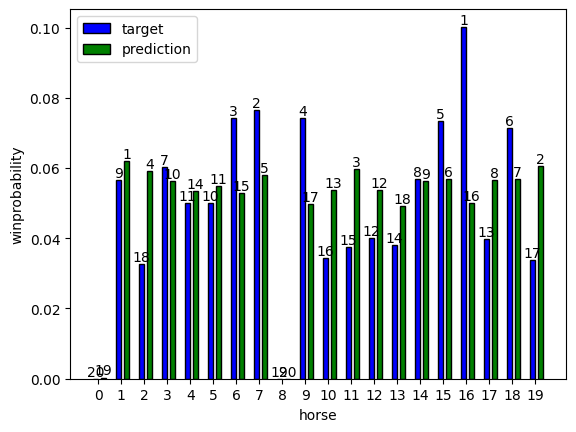

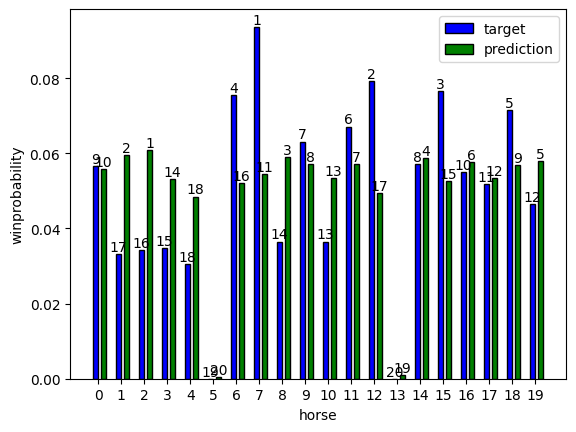

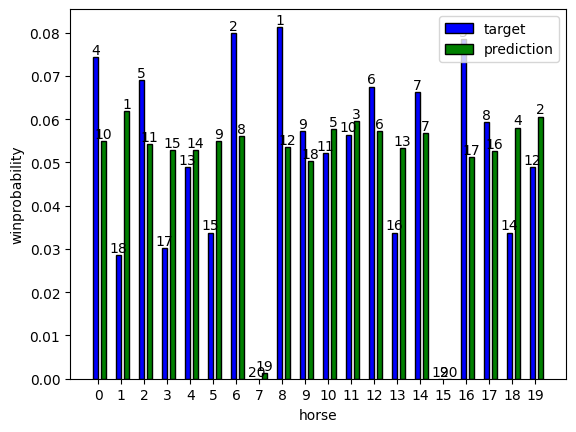

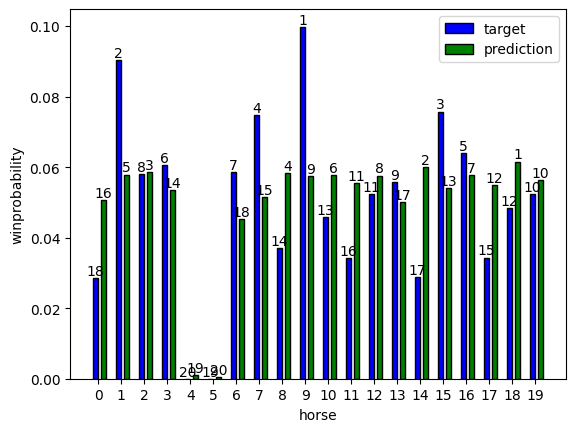

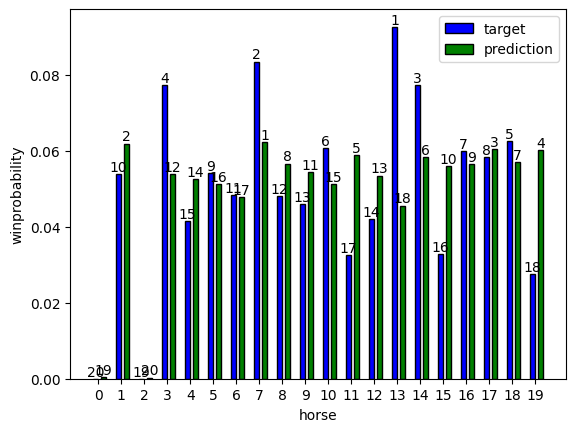

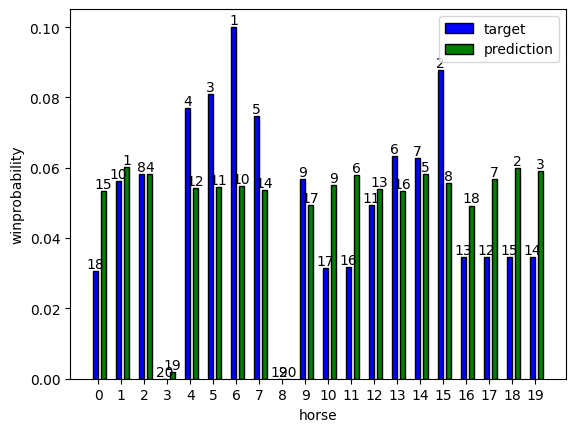

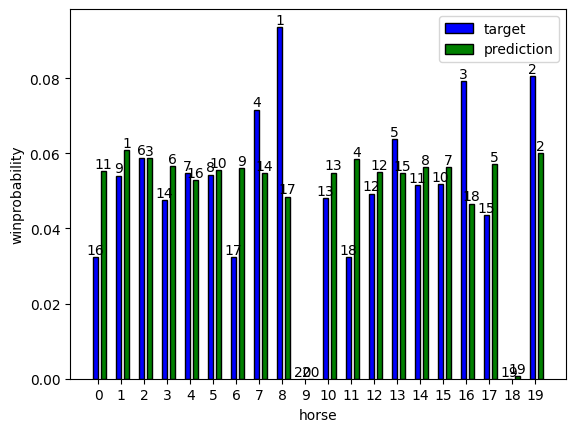

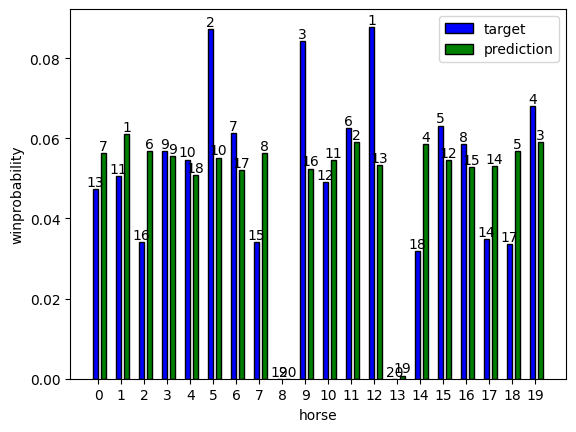

In [54]:
# worst cases
import numpy as np 
import matplotlib.pyplot as plt 

best_cases_target = np.array(test_target)[worst_index]
best_cases_pred = np.array(pred)[worst_index]

width = 0.25
X = np.array(range(20))
for i in range(9):
    bar1 = plt.bar(X, best_cases_target[i], color = 'b', 
            width = width, edgecolor = 'black', 
            label='target')
    order = (-best_cases_target[i]).argsort()
    ranks_1 = order.argsort()+1

    bar2 = plt.bar(X + width+0.1, best_cases_pred[i], color = 'g', 
            width = width, edgecolor = 'black', 
            label='prediction')
    order = (-best_cases_pred[i]).argsort()
    ranks_2 = order.argsort()+1
    
    # Add counts above the two bar graphs
    for index, rect in enumerate(bar1):
        height = rect.get_height()
        rank = ranks_1[index]
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{rank:.0f}', ha='center', va='bottom')
        
    for index, rect in enumerate(bar2):
        height = rect.get_height()
        rank = ranks_2[index]
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{rank:.0f}', ha='center', va='bottom')

    plt.xlabel("horse") 
    plt.ylabel("winprobability")
    plt.legend()
    plt.xticks(X + width/2,range(20))


    plt.show() 